# MLG: Lab 5 (Part 2)

## Exercise 3: Self-organized representation of a collection of images

### Dataset information

The Wang image database is a database of images grouped by class. In this dataset, we downloaded only the 1000 images. You can download them on this website: http://wang.ist.psu.edu/docs/home.shtml more precisely at this address: http://wang.ist.psu.edu/~jwang/test1.tar

For each class we have 100 corresponding images:
- 0-100: Africans
- 100-200: Beaches
- 200-300: Monuments
- etc...

All the images in this dataset are 250x166 pixels or 166x250 pixels.

In [1]:
import numpy as np
import matplotlib.pylab as pl
import KohonenUtils
import WangImageUtilities
%matplotlib inline

In [2]:
extractors = []
for i in range(5):
    extractors.append(WangImageUtilities.ImageFeatureExtractor('Wang_Data')) 
# Here we load images from 300-399 and from 500-599
#for extractor in extractors:
#    i = np.random.randint(0, 10)
#    j = np.random.randint(0, 10)
#    if(i == j):
#        j = np.random.randint(0, 10)
#    print(i, j)
#    extractor.load_images(list_indices=list(np.arange(100*i, 100*i + 100)) + list(np.arange(100*j, 100*j+100)))

experiments = [(5, 7), (6, 1), (0, 3), (2, 0), (1, 3)]
i = 0
for j, k in experiments:
    extractors[i].load_images(list_indices=list(np.arange(100*j, 100*j + 100)) + list(np.arange(100*k, 100*k + 100)))
    i = i + 1

200 images loaded!
200 images loaded!
200 images loaded!
200 images loaded!
200 images loaded!


### Dataset Visualization

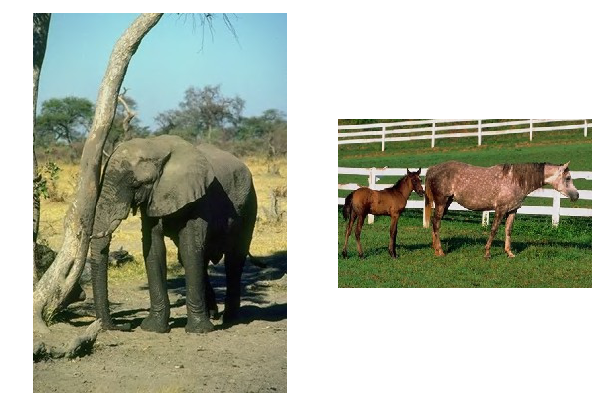

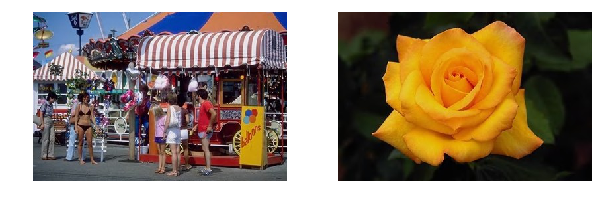

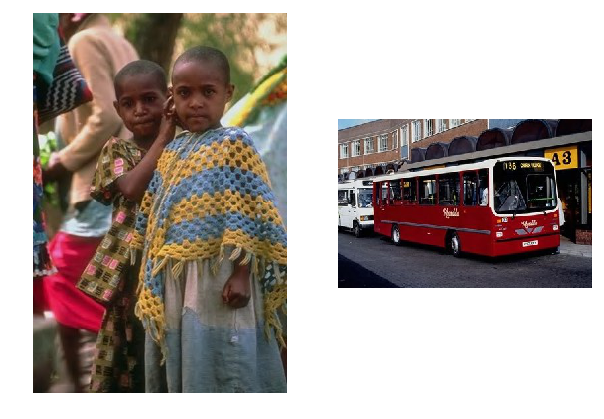

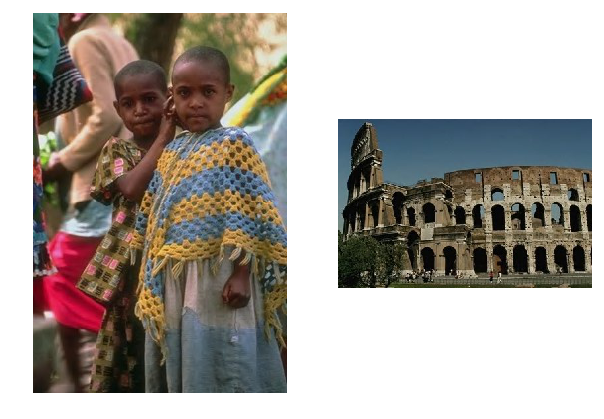

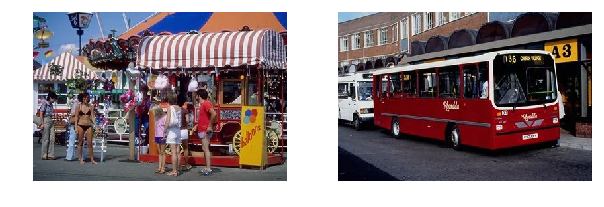

In [3]:
for extractor in extractors:

    pl.figure(figsize=(10, 20))
    pl.subplot(121)
    pl.imshow(extractor.images[0])
    pl.axis('off')
    pl.subplot(122)
    pl.imshow(extractor.images[100])
    _ = pl.axis('off')

### Clustering with SOM

In [4]:
np.seterr(divide='ignore', invalid='ignore')

histograms_list = []
for extractor in extractors:
    for method in range(4):
        if method+1 == 1:
            # Grey intensity histogram ---> compute greayscale of image
            #   and uses result to compute indices and classify
            histograms = extractor.extract_histogram()
        elif method+1 == 2:
            # Hue histogram --> converts image to HUE value (then normalized)
            #   and uses it to fill histogram
            histograms = extractor.extract_hue_histogram()
        elif method+1 == 3:
            # Color instensity histogram ---> get color value for each image
            #   and uses result to compute histogram
            histograms = extractor.extract_color_histogram()
        elif method+1 == 4:
            # Color instensity histogram ---> get color value for each image
            #   and uses result to compute histogram
            histograms = extractor.extract_yuv_histogram()
        else:
            print('Implement your own method for extracting features if you like!')
        histograms_list.append(histograms)

In [8]:
kmaps = []
i = 0
for histograms in histograms_list:
    kmap = KohonenUtils.KohonenMap(side_rows=12,
                                   side_cols=12,
                                   size_vector=histograms.shape[1])

    n_iter = 10
    learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.05, n_iter*histograms.shape[0])
    neighborhood_size = KohonenUtils.ExponentialTimeseries(2./3 * kmap._map.shape[1], 1, n_iter*histograms.shape[0])

    names = []
    for index in extractors[int(i / 4)].image_indices:
        names.append(str(index))

    kmap.train(histograms, names, n_iter, learning_rate, neighborhood_size)
    kmaps.append(kmap)
    
    i = i + 1

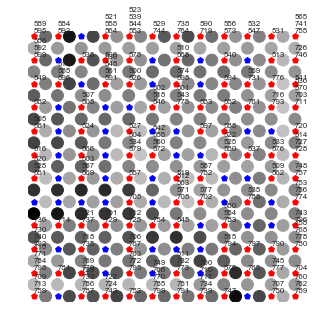

set: 0, method: 0


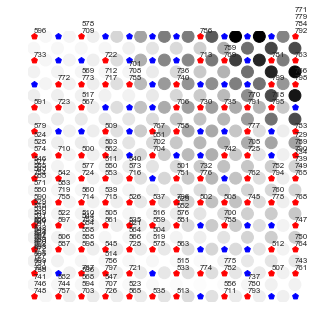

set: 0, method: 1


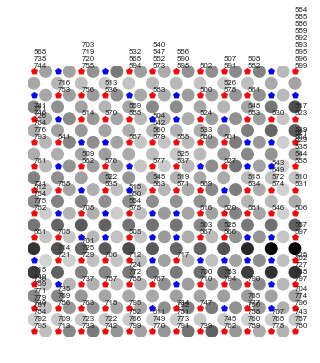

set: 0, method: 2


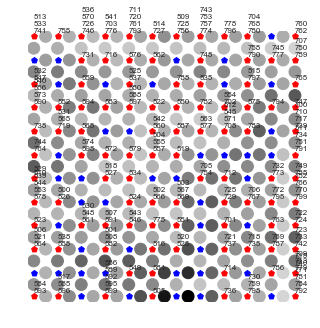

set: 0, method: 3


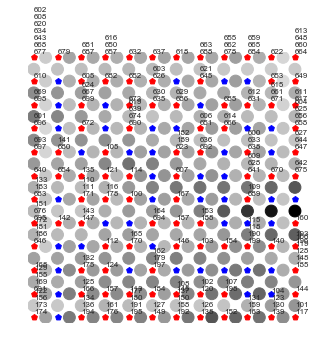

set: 1, method: 0


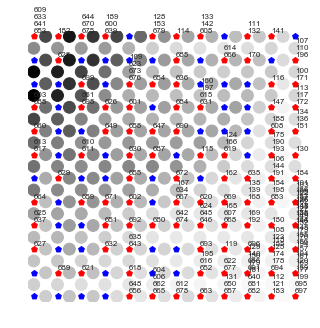

set: 1, method: 1


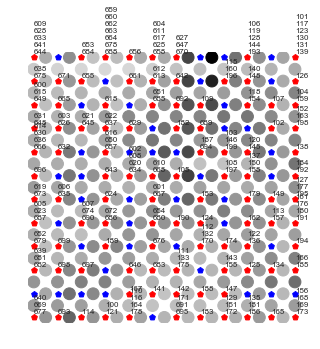

set: 1, method: 2


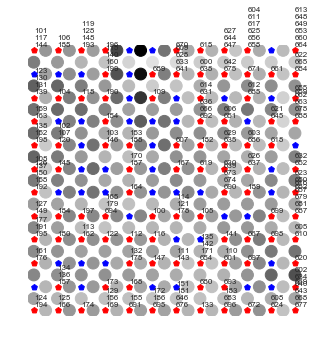

set: 1, method: 3


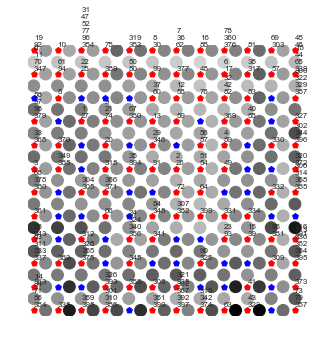

set: 2, method: 0


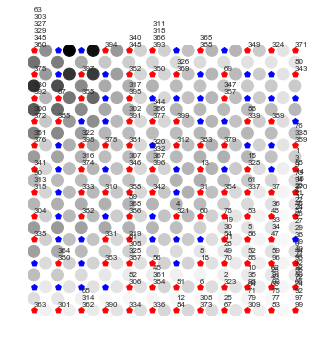

set: 2, method: 1


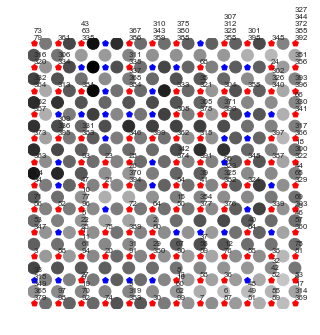

set: 2, method: 2


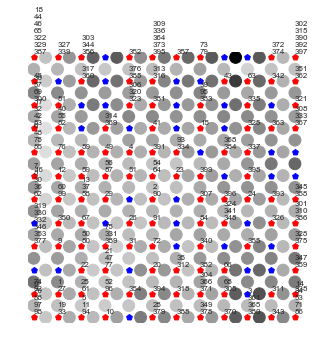

set: 2, method: 3


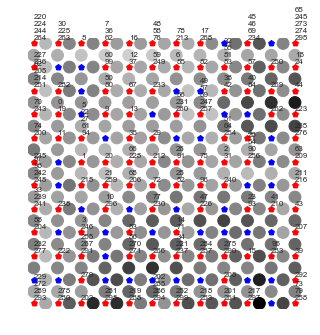

set: 3, method: 0


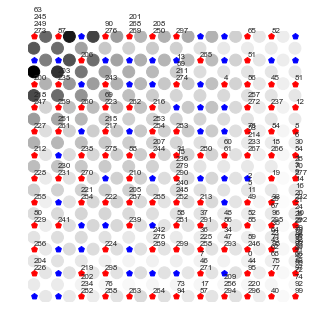

set: 3, method: 1


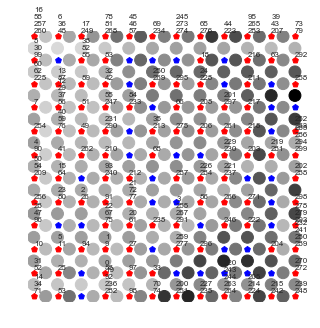

set: 3, method: 2


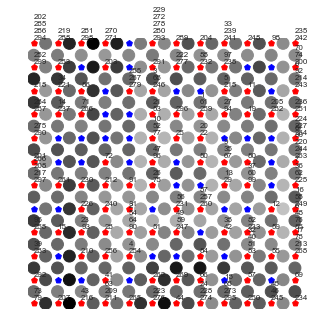

set: 3, method: 3


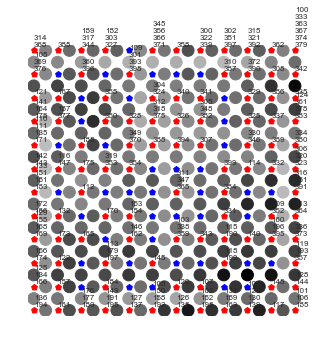

set: 4, method: 0


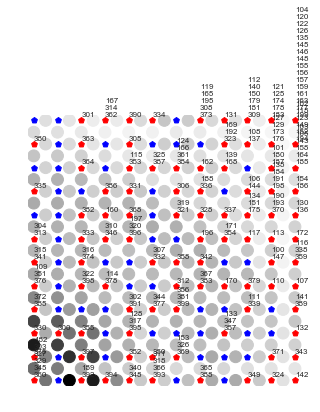

set: 4, method: 1


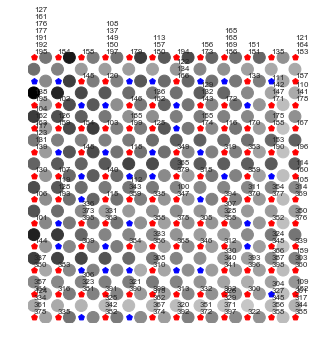

set: 4, method: 2


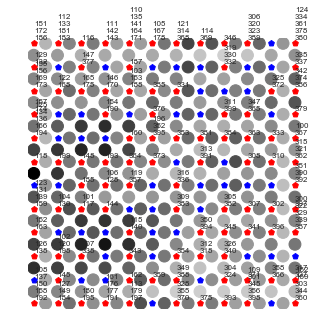

set: 4, method: 3


In [9]:
i = 0
for kmap in kmaps:
    img_name = 'som_set' + str(int(i/4)) + '_method' + str(i % 4) + '.jpg'
    kmap.plot_umatrix(plot_empty=True, plot_names=True, img_name=img_name)
    
    extractors[int(i/4)].to_html('som_set' + str(int(i/4)) + '_method' + str(i % 4) + '.html', kmap)
    print('set: ' + str(int(i/4)) + ', method: ' + str(i % 4))
    
    i = i + 1

To simplify analysis, we can write the images to HTML. This is easier to see and analyze.

In [7]:
# Writes a 'som.html' file
# You can visualize the results and click on a neuron to see other images assigned to this neuron
#i = 0
# TOFIX 
#for extractor in extractors:
#    extractor.to_html('som' + str(i) + '.html', kmap)
#    i = i + 1

<h3>REPORT (date of submission: 23.5 before 23:55)</h3>

1. Explain the three different methods we provided for extracting features. What do you understand about them (input, output), how do they work ?</p>
> For each method --> extract specific feature from image (corresponddingly grayscale intensity, hue and color intensity over all the pixels), fill an histogram with those values : each image is entered as a vector of values. From this histogram (of dimensions N_images*N_pixels_per_image) a training map is trained and a u_matrix is obtained as output.
2. Try the SOM with several (minimum 3) different sets of images (always 100 images per class and at least two classes). You can change the size of the Self-Organizing Map as well as its parameters. 
> Each 100's of image is of the same class (0 -> 99, 100 -> 199, ...) so 10 classes in total


<ul>
<li> Note that we provided three methods for extracting features: for at least one of the test you do try with all three methods and compare the results. 
<li> Include for each experiment an U-Matrix (with images - print screen of html)) that you find interesting. Explain why you find it interesting (what are the input images, with which features you trained your Self-Organizing Map, with which parameters, and how it is reflected in the results)...
</ul>
</p>